In [7]:



from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import ssapp.Utils as Utils
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
%load_ext autoreload
%autoreload 2

from torch.utils.data.dataloader import DataLoader
import torch

import ssapp.data.AntennaDatasetLoaders as AntennaDatasets
from ssapp.models.NeuralNetworkModels.Autoencoders import PatchAntenna1ConvAutoEncoder
from ssapp.models.HelperFunctions import loadModel



AntennaDatasets.set_global_random_seed(42)

dataset = AntennaDatasets.load_serialized_dataset('CircularHornDataset1')




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


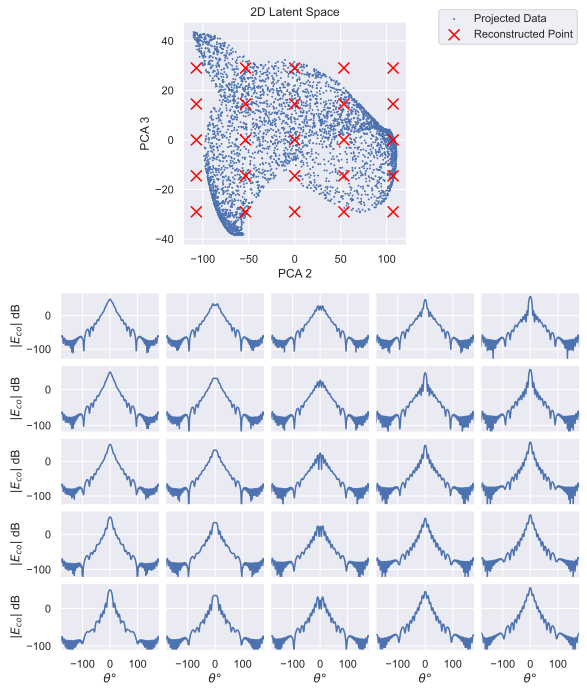

In [8]:
from ssapp.visualization import PCA_Visualisation

from ssapp.visualization.PCA_Visualisation import plotInverseTransformStandardPCA


plotInverseTransformStandardPCA(dataset,component='co',pca_components = [2,3],phi_cut = [0], num_std_dev=1.5,num_cols=5,num_rows=5)

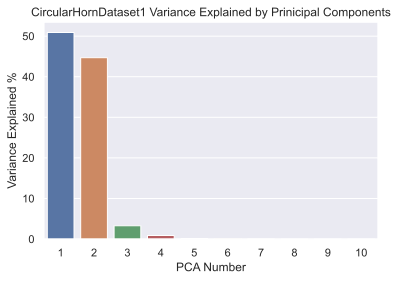

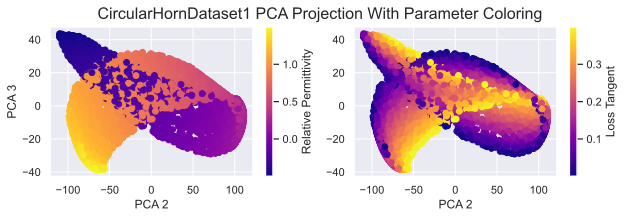

In [9]:
from ssapp.visualization.PCA_Visualisation import plotParameterColoredLatentSpace, plotPCAVariance
from ssapp.Utils import genModelComparison
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA



plotPCAVariance(dataset)


plotParameterColoredLatentSpace(dataset,pca_components = (2,3),param_names = ['Relative Permittivity','Loss Tangent'],figsize = (10,2.75))



In [10]:
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,SGDRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import LinearSVR
from ssapp.data.Metrics import relRMSE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.neural_network import MLPRegressor


benchmark_models = {'Gaus. Proc.':GaussianProcessRegressor(),
                    'std_GP': Pipeline([('scaler', StandardScaler()), ('gp', GaussianProcessRegressor())]),
                    'Linear Reg.':LinearRegression()}

test_metrics = {'Mean Squared':metrics.mean_squared_error,
                'Max Error': metrics.max_error,
                'Explained Variance': metrics.explained_variance_score,
                'Relative RMSE ': relRMSE}



df = genModelComparison(dataset, benchmark_models= benchmark_models, test_metrics=test_metrics, train_test_ratio=0.7)

In [11]:
pd.options.display.float_format = '{:,.3e}'.format
print(df)

                    Gaus. Proc. Train  Gaus. Proc. Val  std_GP Train  \
Mean Squared                9.543e-05        1.020e-04     3.765e-05   
Max Error                   4.540e-01        5.347e-01     4.369e-01   
Explained Variance          1.000e+00        1.000e+00     1.000e+00   
Relative RMSE               5.900e-03        6.105e-03     3.706e-03   

                    std_GP Val  Linear Reg. Train  Linear Reg. Val  
Mean Squared         7.165e-05          1.804e+00        1.783e+00  
Max Error            9.477e-01          3.071e+01        3.050e+01  
Explained Variance   1.000e+00          3.419e-01        3.484e-01  
Relative RMSE        5.117e-03          1.387e+00        1.381e+00  


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


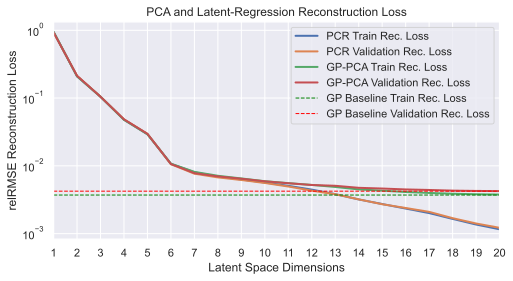

In [12]:
from ssapp.visualization.PCA_Visualisation import plotGPvsPCADimensions
from ssapp.Utils import FigureSaver

figsaver = FigureSaver(subfolder='Circular Horn')

plotGPvsPCADimensions(dataset,max_number_pca = 20)

figsaver.save(filename='PCA_Latent_Regression_Reconstruction_loss')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


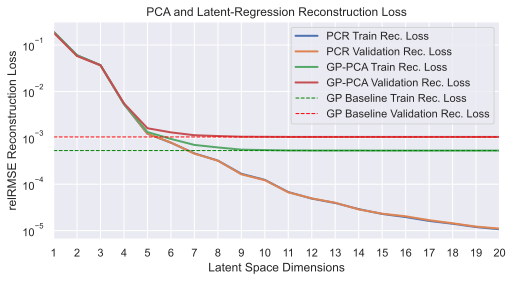

In [13]:
from ssapp.data.AntennaDatasetLoaders import load_serialized_dataset
from ssapp.Utils import FigureSaver
from ssapp.visualization.PCA_Visualisation import plotGPvsPCADimensions
patch_dataset = load_serialized_dataset('PatchAntennaDataset2')

patchSaver = FigureSaver(subfolder='Patch Antenna Latent Space Regression')

plotGPvsPCADimensions(patch_dataset,max_number_pca = 20)


patchSaver.save(filename='PatchAntennaPCALatentReconstruction')


In [14]:
from ssapp.visualization.PCA_Visualisation import plotFieldComparison
from ssapp.Utils import train_test_data_split
from ssapp.models.GPModels import PCA_GP_Model, PCA_LR_Model

pca_gp = PCA_GP_Model(num_components=20)
pca_lr = PCA_LR_Model(num_components=20)

train_dataset,test_dataset = train_test_data_split(dataset=dataset)


train_loader = DataLoader(train_dataset, batch_size = len(train_dataset))
test_loader = DataLoader(test_dataset, batch_size = len(test_dataset))


train_param, train_field = next(iter(train_loader))
test_param,test_field = next(iter(test_loader))

pca_gp.fit(train_param,train_field)
pca_lr.fit(train_param,train_field)

gp_pred = pca_gp.predict(test_param)
lr_pred = pca_lr.predict(test_param)





GP relRMSE in percent: 0.5636661475393 %


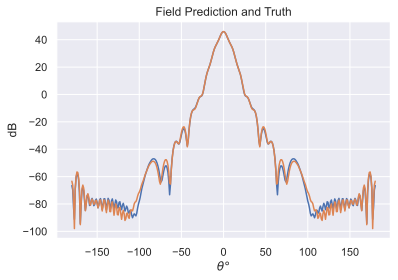

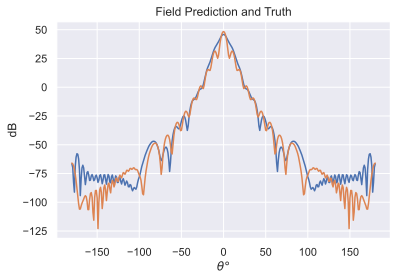

In [15]:
from ssapp.data.Metrics import relRMSE
plotFieldComparison(test_field,gp_pred,idx = 200,phis = 0)
plotFieldComparison(test_field,lr_pred,idx = 200,phis = 0)

print('GP relRMSE in percent:',pca_gp.score(test_param,test_field)*100,'%')

In [70]:
X = np.random.random(0,2)
Y = np.random(0,0.5)
X,Y = np.meshgrid(X,Y)
X = X.reshape(2500,1)
Y = Y.reshape(2500,1)
test_input = np.append(X,Y,axis = 1)

print(test_input.shape)
Z_pred = pca_gp.pred_into_latent(test_input)
plt.scatter(Z_pred[:,0],Z_pred[:,1],c=Y)

TypeError: random() takes at most 1 positional argument (2 given)

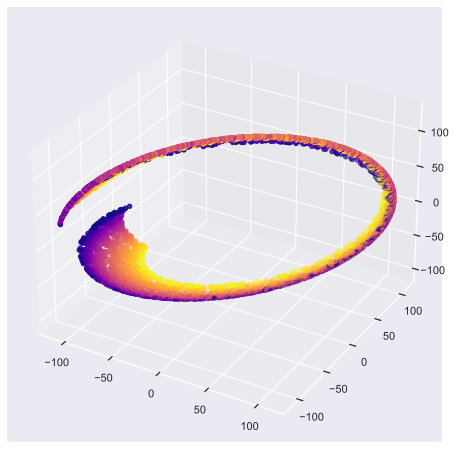

In [71]:
from ssapp.visualization.PCA_Visualisation import plot3DPCA

plot3DPCA(dataset=dataset,param = 1)

In [93]:
from ssapp.visualization.PCA_Visualisation import plot3DContour

plot3DContour(dataset,param=1)
